# Сгенерировать данные, повторяющие примеры из лекций (U-образные, концентрические окружности, XOR, с выбросами),и реализовать на них различные версии метода k ближайших соседей в задачах классификации и регрессии, включая радиусный классификатор, взвешенные методы k ближайших соседей и ядерные функции.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Применение версий KNN к различным данным

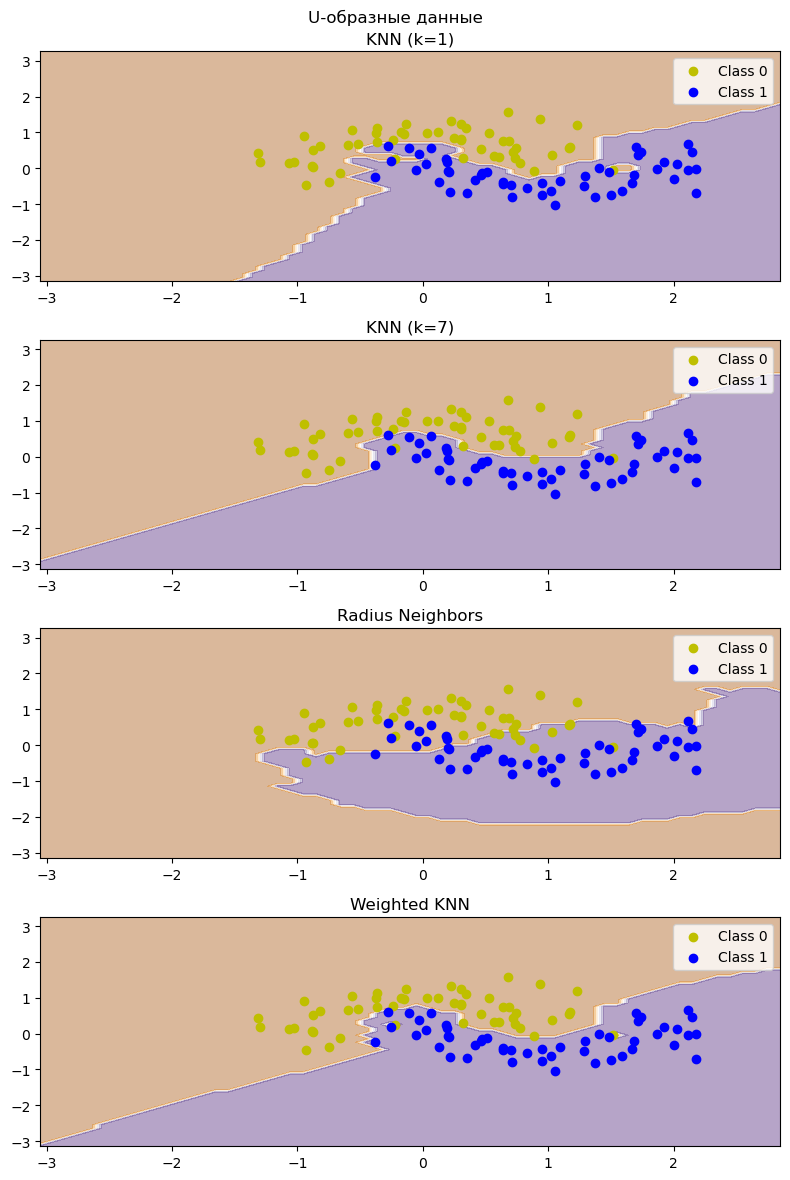

In [100]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
# Генерируем два облака точек
np.random.seed(0)
n = 100
X, y =  datasets.make_moons(n_samples=n, noise=0.3) # Генерирует два облака точек (X и y) с использованием функции make_moons


# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler() # Производим стандартизацию данных с помощью объекта StandardScaler
X_scaled = scaler.fit_transform(X)

# Создает экземпляры классификаторов K-Nearest Neighbors (KNN) с разными значениями числа соседей
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn10 = KNeighborsClassifier(n_neighbors=10)
radius_norm = RadiusNeighborsClassifier(radius=2, outlier_label="most_frequent")
radius_big = RadiusNeighborsClassifier(radius=4, outlier_label="most_frequent")
weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучает каждую из моделей (KNN и Radius Neighbors) 
knn1.fit(X_scaled, y)
knn3.fit(X_scaled, y)
knn7.fit(X_scaled, y)
knn10.fit(X_scaled, y)
radius_norm.fit(X_scaled, y)
radius_big.fit(X_scaled, y)
weighted.fit(X_scaled, y)

# Вычисляем предсказания для всех точек в пространстве, используя сетку xx и yy.
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_knn1 = knn1.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn1 = Z_knn1.reshape(xx.shape)

Z_knn3 = knn3.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn3 = Z_knn3.reshape(xx.shape)

Z_knn7 = knn7.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn7 = Z_knn7.reshape(xx.shape)

Z_knn10 = knn10.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn10 = Z_knn10.reshape(xx.shape)

Z_radius_norm = radius_norm.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_norm = Z_radius_norm.reshape(xx.shape)

Z_radius_big = radius_big.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_big = Z_radius_big.reshape(xx.shape)


Z_weighted = weighted.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_weighted = Z_weighted.reshape(xx.shape)

# Визуализируем данные и границы классов
plt.figure(figsize=(8, 12))
plt.suptitle("U-образные данные")

plt.subplot(4, 1, 1)
plt.contourf(xx, yy, Z_knn1, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=1)') # количество соседей = 1
plt.legend()

plt.subplot(4, 1, 2)
plt.contourf(xx, yy, Z_knn7, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=7)')
plt.legend()

# В отличие от KNN, где классификация зависит от k ближайших соседей, 
# RadiusNeighborsClassifier классифицирует объекты, основываясь на том, сколько соседей находятся внутри заданного радиуса.
plt.subplot(4, 1, 3)
plt.contourf(xx, yy, Z_radius_norm, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Radius Neighbors')
plt.legend()


# В отличие от классического KNN, где все соседи имеют одинаковый вес, 
# взвешенный KNN присваивает ближним соседям больший вес, чем более дальним соседям.
plt.subplot(4, 1, 4)
plt.contourf(xx, yy, Z_weighted, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Weighted KNN')
plt.legend()

plt.tight_layout()

plt.show()

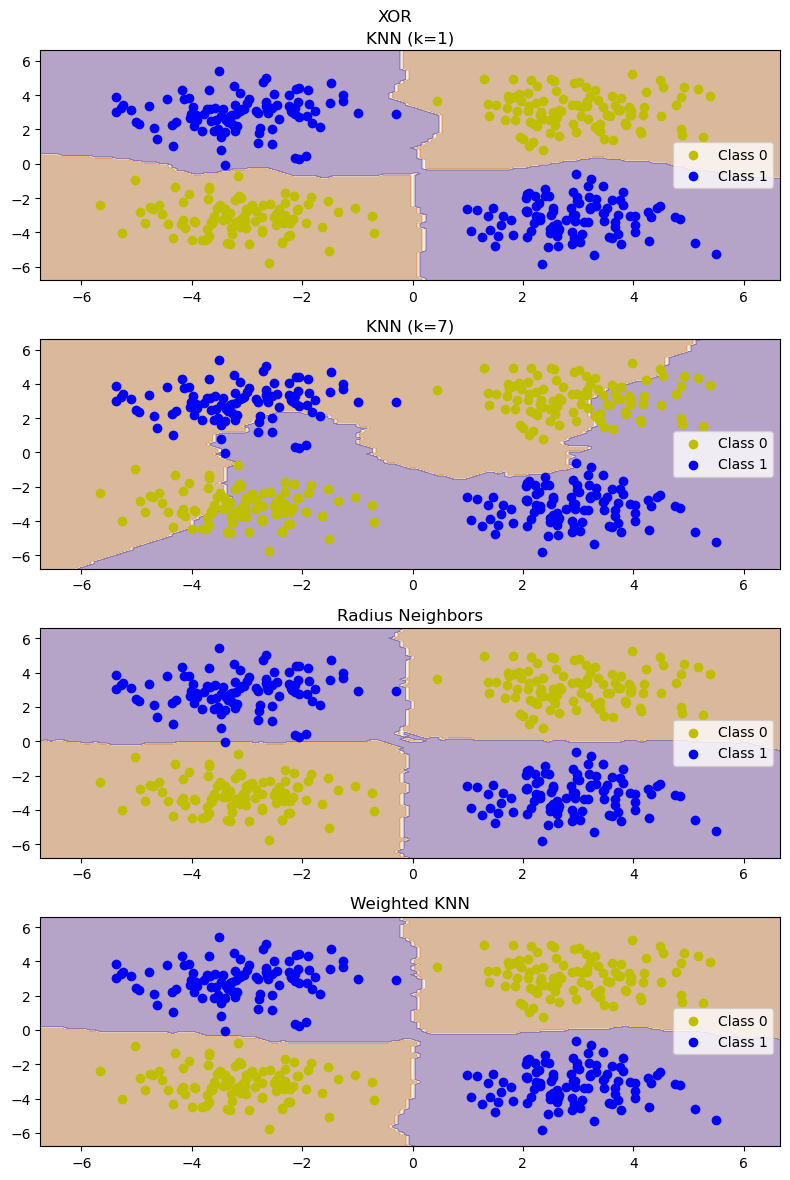

In [101]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Генерируем четыре набора случайных точек данных (X1, X2, X3, X4), представляющих собой два "класса" точек(два облака точек), 
# которые формируют паттерн XOR. 
# То есть, два класса точек находятся в углах квадрата, и это создает нелинейно разделимую структуру данных.
np.random.seed(0)
n = 100

mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]

mean2 = [-3, -3]
cov2 = [[1, 0], [0, 1]]

mean3 = [-3, 3]
cov3 = [[1, 0], [0, 1]]

mean4 = [3, -3]
cov4 = [[1, 0], [0, 1]]



# Генерируем случайные точки
X1 = np.random.multivariate_normal(mean1, cov1, n)
X2 = np.random.multivariate_normal(mean2, cov2, n)
X3 = np.random.multivariate_normal(mean3, cov3, n)
X4 = np.random.multivariate_normal(mean4, cov4, n)

# Создаем метки классов для этих данных. Первые два набора точек (y1 и y2) принадлежат к классу 0,
# а остальные два набора (X3 и X4) принадлежат к классу 1.
y1 = np.zeros(2*n)
y2 = np.ones(2*n)

# Объединяем все наборы данных (X1, X2, X3, X4) и метки классов (y1 и y2) в один общий набор данных (X и y).
X = np.concatenate((X1, X2, X3, X4))
y = np.concatenate((y1, y2))

# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создает несколько экземпляров классификаторов, включая KNeighborsClassifier с разными значениями числа соседей
# и еще один KNeighborsClassifier с весами
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
radius_norm = RadiusNeighborsClassifier(radius=1)
radius_big = RadiusNeighborsClassifier(radius=1.5)
weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучаем модели
knn1.fit(X_scaled, y)
knn3.fit(X_scaled, y)
knn5.fit(X_scaled, y)
knn10.fit(X_scaled, y)
radius_norm.fit(X_scaled, y)
radius_big.fit(X_scaled, y)
weighted.fit(X_scaled, y)

# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 5, X_scaled[:, 0].max() + 5
y_min, y_max = X_scaled[:, 1].min() - 5, X_scaled[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_knn1 = knn1.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn1 = Z_knn1.reshape(xx.shape)

Z_knn3 = knn3.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn3 = Z_knn3.reshape(xx.shape)

Z_knn7 = knn7.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn7 = Z_knn7.reshape(xx.shape)

Z_knn10 = knn10.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn10 = Z_knn10.reshape(xx.shape)

Z_radius_norm = radius_norm.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_norm = Z_radius_norm.reshape(xx.shape)

Z_radius_big = radius_big.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_big = Z_radius_big.reshape(xx.shape)


Z_weighted = weighted.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_weighted = Z_weighted.reshape(xx.shape)

# Визуализируем данные и границы классов
plt.figure(figsize=(8, 12))
plt.suptitle("XOR")

plt.subplot(4, 1, 1)
plt.contourf(xx, yy, Z_knn1, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=1)') # количество соседей = 1
plt.legend()

plt.subplot(4, 1, 2)
plt.contourf(xx, yy, Z_knn7, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=7)')
plt.legend()

plt.subplot(4, 1, 3)
plt.contourf(xx, yy, Z_radius_norm, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Radius Neighbors')
plt.legend()


plt.subplot(4, 1, 4)
plt.contourf(xx, yy, Z_weighted, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Weighted KNN')
plt.legend()

plt.tight_layout()

plt.show()

# XOR k =1 смотрит на ближайшего одного соседа и выбрает себе класс в зависимости от этого. XOR - линейно не разделимы

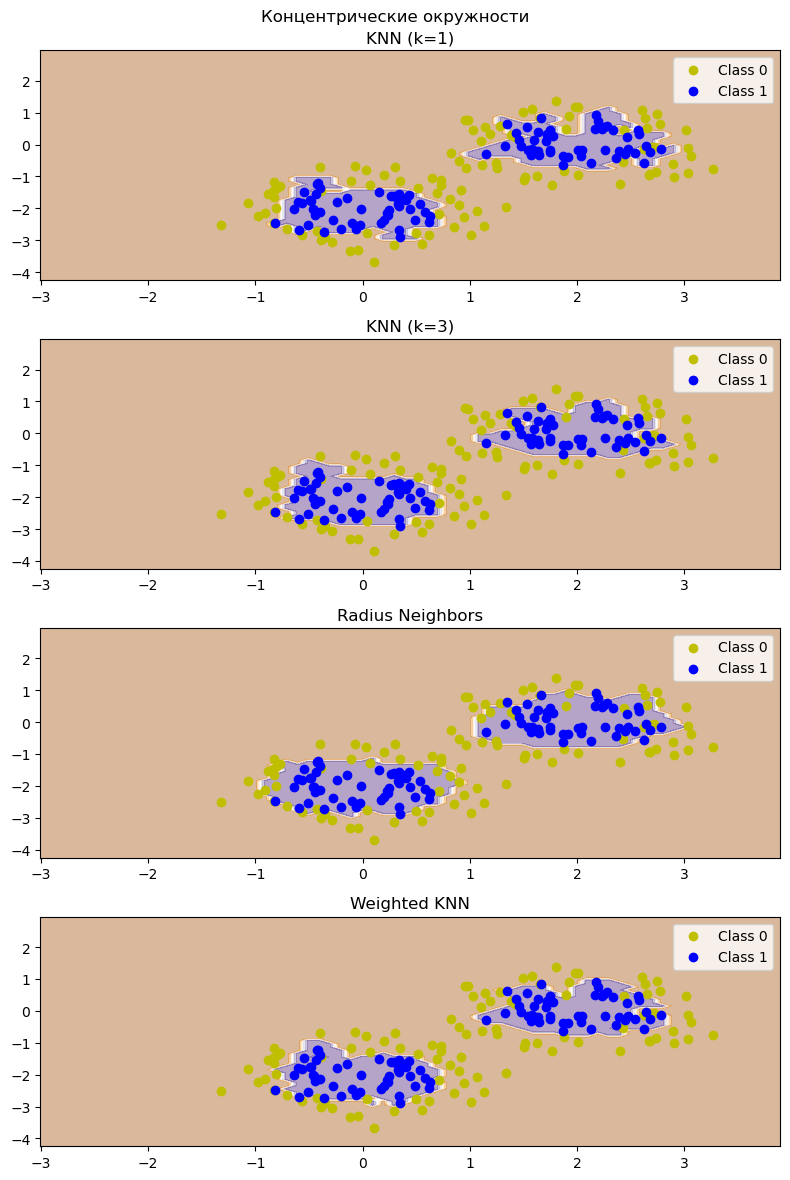

In [102]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Генерируем два облака точек
# создаем данные для двух классов точек, расположенных внутри и вне окружностей. 
# Первый набор окружностей сдвигается по оси Y, а второй - по оси X.
np.random.seed(0)
n = 100
X1, y1 = datasets.make_circles(n_samples=n, factor=.5,
                                      noise=.2)
X1[:, 1] -= 2  # Сдвигаем первую окружность по оси Y


X2, y2 = datasets.make_circles(n_samples=n, factor=.5,
                                      noise=.2)
X2[:, 0] += 2  # Сдвигаем вторую окружность по оси X

# Объединяем данные
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем экземпляры классификаторов
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
radius_norm = RadiusNeighborsClassifier(radius=0.5, outlier_label="most_frequent")
radius_big = RadiusNeighborsClassifier(radius=1, outlier_label="most_frequent")
weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучаем модели
knn1.fit(X_scaled, y)
knn3.fit(X_scaled, y)
knn5.fit(X_scaled, y)
knn10.fit(X_scaled, y)
radius_norm.fit(X_scaled, y)
radius_big.fit(X_scaled, y)
weighted.fit(X_scaled, y)

# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 2
y_min, y_max = X_scaled[:, 1].min() - 2, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_knn1 = knn1.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn1 = Z_knn1.reshape(xx.shape)

Z_knn3 = knn3.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn3 = Z_knn3.reshape(xx.shape)

Z_knn5 = knn5.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn5 = Z_knn5.reshape(xx.shape)

Z_knn10 = knn10.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn10 = Z_knn10.reshape(xx.shape)

Z_radius_norm = radius_norm.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_norm = Z_radius_norm.reshape(xx.shape)

Z_radius_big = radius_big.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_big = Z_radius_big.reshape(xx.shape)


Z_weighted = weighted.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_weighted = Z_weighted.reshape(xx.shape)

# Визуализируем данные и границы классов
plt.figure(figsize=(8, 12))
plt.suptitle("Концентрические окружности")
# Концентрические окружности - это геометрическая фигура, представляющая собой несколько окружностей,
# центры которых расположены в одной и той же точке, но радиусы различаются

plt.subplot(4, 1, 1)
plt.contourf(xx, yy, Z_knn1, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=1)')
plt.legend()

plt.subplot(4, 1, 2)
plt.contourf(xx, yy, Z_knn3, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=3)')
plt.legend()

plt.subplot(4, 1,3)
plt.contourf(xx, yy, Z_radius_norm, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Radius Neighbors')
plt.legend()
# Radius Neighbors - учитывает всех соседей, находящихся в пределах заданного радиуса от точки запроса.
# При классификации новой точки запроса Radius Neighbors ищет все точки обучающего набора данных, 
# находящиеся внутри заданного радиуса от точки запроса.
# Затем он определяет класс для точки запроса на основе большинства классов среди найденных соседей внутри радиуса.

plt.subplot(4, 1, 4)
plt.contourf(xx, yy, Z_weighted, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Weighted KNN')
plt.legend()
# Weighted KNN - это вариация метода K-Nearest Neighbors (KNN), в которой каждый сосед учитывается с весом,
# зависящим от расстояния до точки запроса.
# В Weighted KNN каждому соседу присваивается вес, обратно пропорциональный его расстоянию до точки запроса.
# Ближайшие соседи имеют больший вес, чем более дальние соседи. Затем классификация
# новой точки запроса выполняется путем учета весов соседей: чем ближе сосед, тем больший вклад он вносит в классификацию.


plt.tight_layout()
plt.show()

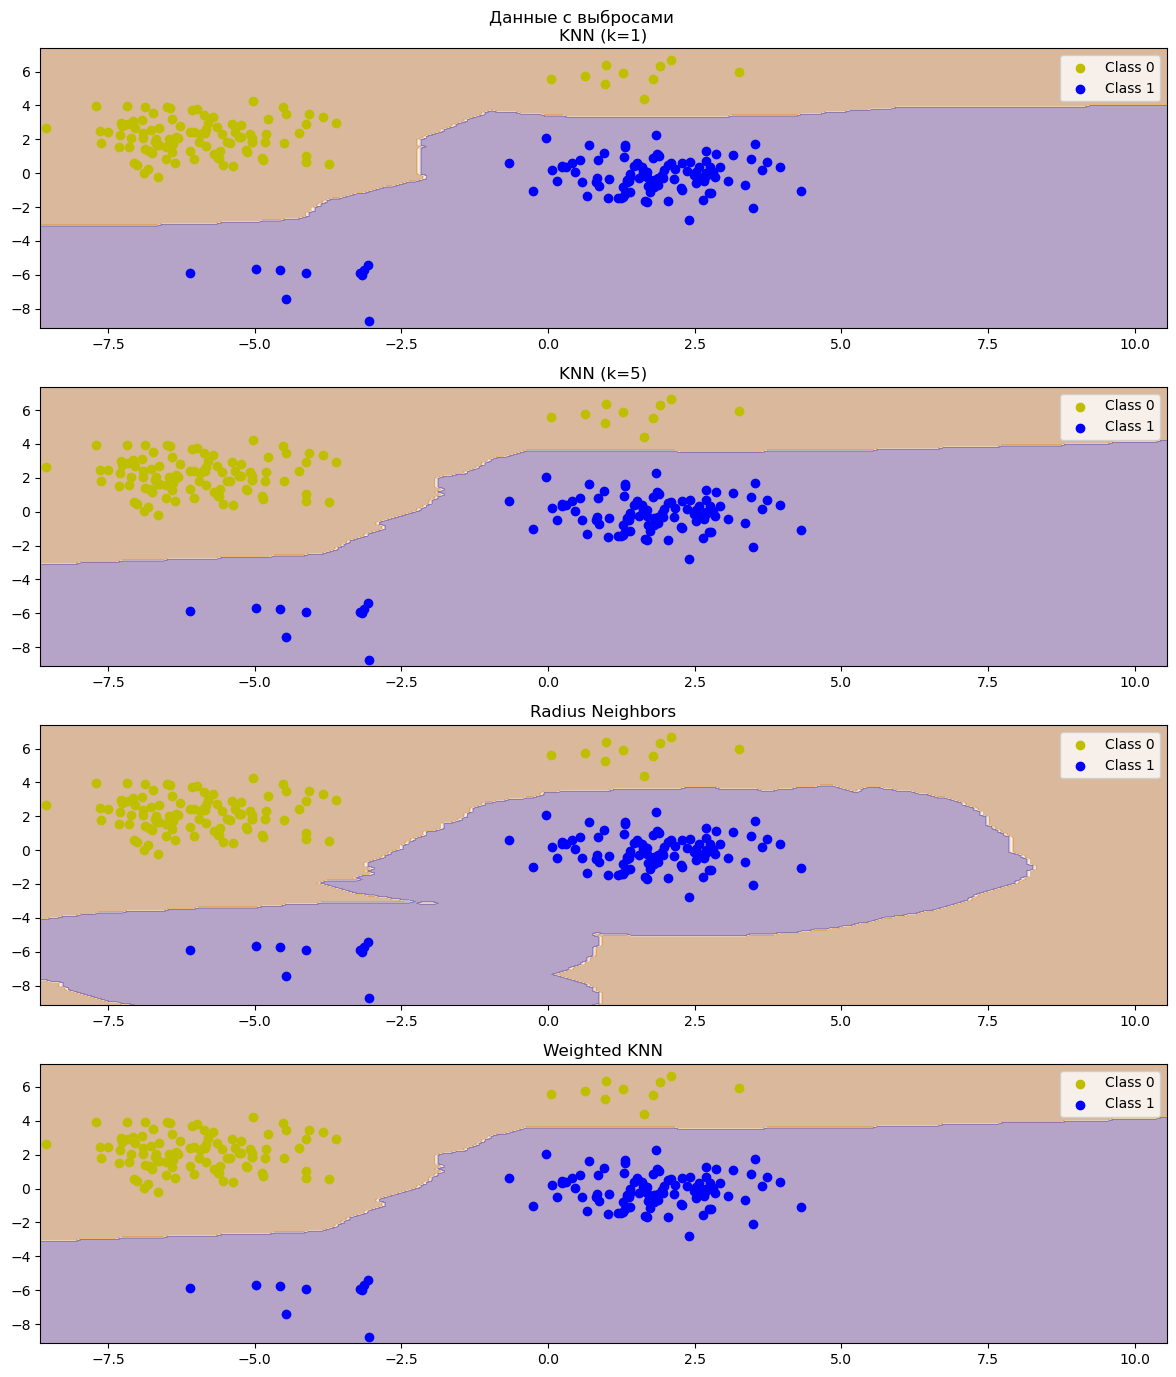

In [133]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler

#  Генерируем данные, представляющие собой четыре "облака" точек
np.random.seed(0)
n = 100
mean1 = [-6, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [1, 6]
cov2 = [[1, 0], [0, 1]]

mean3 = [2, 0]
cov3 = [[1, 0], [0, 1]]

mean4 = [-4, -6]
cov4 = [[1, 0], [0, 1]]



# Генерируем случайные точки
X1 = np.random.multivariate_normal(mean1, cov1, n)
X2 = np.random.multivariate_normal(mean2, cov2, 10)
X3 = np.random.multivariate_normal(mean3, cov3, n)
X4 = np.random.multivariate_normal(mean4, cov4, 10)

# Создаем метки классов
y1 = np.zeros(n+10)
y2 = np.ones(n+10)

# Объединяем данные
X = np.concatenate((X1, X2, X3, X4))
y = np.concatenate((y1, y2))

# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем экземпляры классификаторов
knn1 = KNeighborsClassifier(n_neighbors=1)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
radius_norm = RadiusNeighborsClassifier(radius=1, outlier_label="most_frequent")
radius_big = RadiusNeighborsClassifier(radius=3, outlier_label="most_frequent")
weighted = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучаем модели
knn1.fit(X_scaled, y)
knn3.fit(X_scaled, y)
knn5.fit(X_scaled, y)
knn10.fit(X_scaled, y)
radius_norm.fit(X_scaled, y)
radius_big.fit(X_scaled, y)
weighted.fit(X_scaled, y)

# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 7, X_scaled[:, 0].max() + 9
y_min, y_max = X_scaled[:, 1].min() - 5, X_scaled[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_knn1 = knn1.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn1 = Z_knn1.reshape(xx.shape)

Z_knn3 = knn3.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn3 = Z_knn3.reshape(xx.shape)

Z_knn5 = knn5.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn5 = Z_knn5.reshape(xx.shape)

Z_knn10 = knn10.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_knn10 = Z_knn10.reshape(xx.shape)

Z_radius_norm = radius_norm.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_norm = Z_radius_norm.reshape(xx.shape)

Z_radius_big = radius_big.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_radius_big = Z_radius_big.reshape(xx.shape)


Z_weighted = weighted.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_weighted = Z_weighted.reshape(xx.shape)

# Визуализируем данные и границы классов
plt.figure(figsize=(12, 14))
plt.suptitle("Данные с выбросами")
# набор данных (X и y), который был сгенерирован и обработан в данном коде, 
# включает в себя точки данных, которые можно считать "выбросами" или аномалиями

# В данном случае, эти "выбросы" были созданы путем добавления дополнительных точек данных (X2 и X4) 
# внутри четырех облаков точек, чтобы сделать набор данных более сложным и разнообразным.

plt.subplot(4, 1, 1)
plt.contourf(xx, yy, Z_knn1, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=1)')
plt.legend()


plt.subplot(4, 1, 2)
plt.contourf(xx, yy, Z_knn5, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('KNN (k=5)')
plt.legend()

plt.subplot(4, 1, 3)
plt.contourf(xx, yy, Z_radius_norm, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Radius Neighbors')
plt.legend()


plt.subplot(4, 1, 4)
plt.contourf(xx, yy, Z_weighted, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Weighted KNN')
plt.legend()

plt.tight_layout()
plt.show()

# Ядерная регрессия

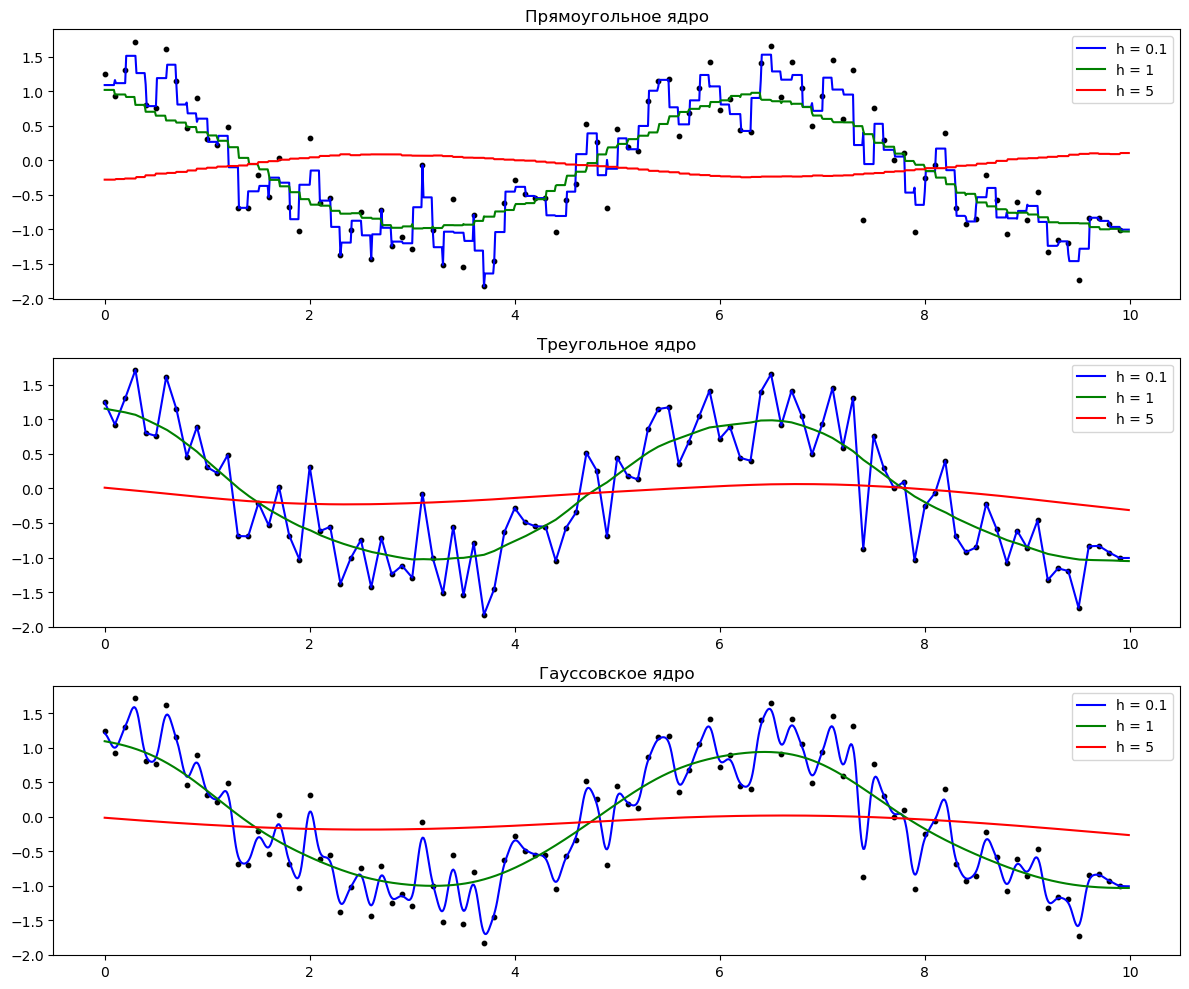

In [134]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

x = np.arange(0, 10, 0.1)
x_est = np.arange(0, 10, 0.01)
N = len(x)

y_cos = np.cos(x)
y = y_cos + np.random.normal(0, 0.5, N)

# аппроксимация ядерным сглаживанием
H = [0.1, 1, 5]  # значения параметра сглаживания


# Функции ядерных функций
gaussian_kernel = lambda r: np.exp(-2 * r * r)  #функции которые мы применяем, чтобы сгладить модель, аппроксимировать
triangular_kernel = lambda r: np.abs(1 - r) * (r <= 1)
rectangular_kernel = lambda r: 0.5 * (r <= 1)


# Функция для вычисления весов
def get_weights(xx, xi, kernel, h):
    ro = np.abs(xx - xi)
    return kernel(ro / h)


plt.figure(figsize=(12, 10))
plot_number = 0

# Проходим по каждому ядру и параметру сглаживания
for kernel, kernel_name in zip([rectangular_kernel, triangular_kernel, gaussian_kernel], ['Прямоугольное ядро', 'Треугольное ядро', 'Гауссовское ядро']):
    plot_number += 1
    plt.subplot(3, 1, plot_number)
    plt.scatter(x, y, color='black', s=10) 
    plt.title(f"{kernel_name}")
    for h, color in zip(H, ['blue', 'green', 'red']):
        y_est = []
        for xx in x_est:
            ww = np.array([get_weights(xx, xi, kernel, h) for xi in x])
            yy = np.dot(ww, y) / sum(ww)
            y_est.append(yy)


        #plt.plot(x, y_sin, color='blue')
        plt.plot(x_est, y_est, color=f'{color}', label=f'h = {h}')
        
    plt.legend()

plt.tight_layout()
plt.show()
# h - показатель ширина окна, сколько мы берем для сглаживания. Выбор ядра влияет на Гладкость аппроксимации 

# Применение KNN на выбранном датасете для классификации

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
data = pd.read_csv("D:/Mirea/archive/glass.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [33]:
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [34]:
x = data.drop(['Type'], axis = 1)
y = data['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred=neigh.predict(x_test)


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5581395348837209

# Датасет для регрессии

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("D:/Mirea/cwurData.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [47]:

df = df.drop("institution", axis = 1)
df = df.drop("country", axis=1)
df = df.drop("broad_impact", axis = 1)
df.head(10)


,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,7,9,1,1,1,1,5,100.00,2012
1,2,2,9,17,3,12,4,4,1,91.67,2012
2,3,3,17,11,5,4,2,2,15,89.50,2012
3,4,1,10,24,4,16,16,11,50,86.17,2012
4,5,4,2,29,7,37,22,22,18,85.21,2012
5,6,5,8,14,2,53,33,26,101,82.50,2012
6,7,2,13,28,9,15,13,19,26,82.34,2012
7,8,6,14,31,12,14,6,15,66,79.14,2012
8,9,7,23,21,10,13,12,14,5,78.86,2012
9,10,8,16,52,6,6,5,3,16,78.55,2012


In [48]:
y_test = df["quality_of_education"]
X_test = df.drop("quality_of_education", axis=1)

df = df.dropna(subset=['quality_of_education'])
X_train = df.drop("quality_of_education", axis=1)
#X_train = X_train.drop("is_top_ranked", axis=1)
y_train = df["quality_of_education"]

X_train

,world_rank,national_rank,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,9,1,1,1,1,5,100.00,2012
1,2,2,17,3,12,4,4,1,91.67,2012
2,3,3,11,5,4,2,2,15,89.50,2012
3,4,1,24,4,16,16,11,50,86.17,2012
4,5,4,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...
2195,996,7,567,218,926,845,812,816,44.03,2015
2196,997,4,566,218,997,908,645,871,44.03,2015
2197,998,18,549,218,830,823,812,824,44.03,2015
2198,999,40,567,218,886,974,812,651,44.02,2015


In [49]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor().fit(X_train, y_train)

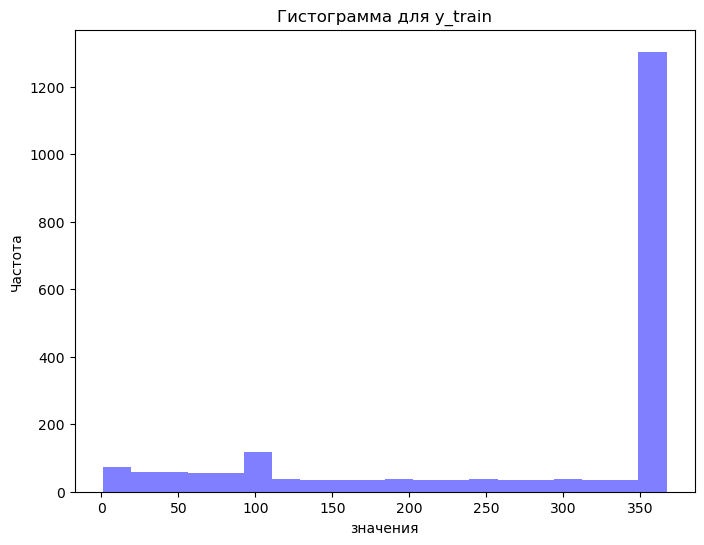

In [50]:
import matplotlib.pyplot as plt

# Create a histogram for the first column of X_test (change the column index as needed)
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=20, alpha=0.5, color='blue')
plt.xlabel('значения')
plt.ylabel('Частота')
plt.title('Гистограмма для y_train')
plt.show()

In [51]:
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
r2_score(y_test, reg.predict(X_test))

#Значение R² (коэффициент детерминации) равное 0.6493673976747933 указывает на то, 
#что модель объясняет примерно 64.94% вариации в целевой переменной на тестовом наборе данных.
#Значение R² в диапазоне от 0 до 1 позволяет судить о том,
#насколько хорошо модель подходит для предсказания целевой переменной.


0.8046284607464576

In [53]:
import math #RMSE квадрат MSE реальная ошибка по предсказаному
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,reg.predict(X_test)))
#насколько точно предсказываю пропуски
# Корень из среднеквадратичной ошибки (RMSE) - это метрика, которая измеряет среднюю абсолютную ошибку между
#фактическими и предсказанными значениями целевой переменной.Она предоставляет информацию о том, насколько 
#точно модель делает прогнозы.


53.884103575932464

# Примеры полиномиального обогащения

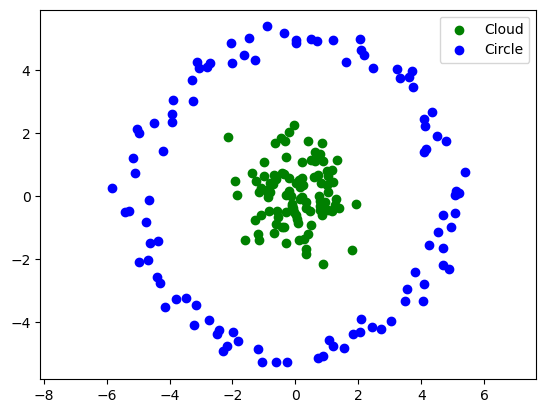

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Создание набора точек в форме облака
x_cloud = np.random.normal(0, 1, 100)  # x-координаты случайных точек
y_cloud = np.random.normal(0, 1, 100)  # y-координаты случайных точек

# x_cloud и y_cloud - это массивы случайных точек, которые создают облако случайных точек. np.random.normal(0, 1, 100)


# Создание набора точек внешнего круга с шумом
theta = np.linspace(0, 2*np.pi, 100)  # углы от 0 до 2*pi
radius = 5  # радиус круга
x_circle = radius * np.cos(theta) + np.random.normal(0, 0.3, 100)  # x-координаты точек на окружности с шумом
y_circle = radius * np.sin(theta) + np.random.normal(0, 0.3, 100)  # y-координаты точек на окружности с шумом
# x_circle и y_circle - это массивы точек, которые создают окружность с радиусом 5 
# и добавляют случайный шум к координатам точек на окружности

# theta - это массив углов, от 0 до 2π (полный оборот), который используется для создания точек на окружности.

# Визуализация результатов
plt.scatter(x_cloud, y_cloud, color='green', label='Cloud')
plt.scatter(x_circle, y_circle, color='blue', label='Circle')
plt.axis('equal')
plt.legend()
plt.show()


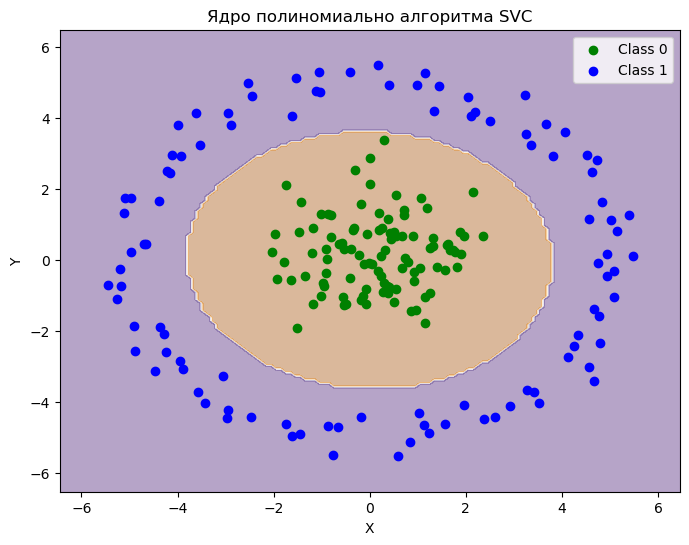

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Создаем два набора точек, X1 и X2, представляющие облако случайных точек и круг с шумом соответственно
x_cloud = np.random.normal(0, 1, 100)  # x-координаты случайных точек
y_cloud = np.random.normal(0, 1, 100)  # y-координаты случайных точек

X1 = np.vstack((x_cloud, y_cloud)).T


# Создание набора точек внешнего круга с шумом
theta = np.linspace(0, 2*np.pi, 100)  # углы от 0 до 2*pi
radius = 5  # радиус круга
x_circle = radius * np.cos(theta) + np.random.normal(0, 0.3, 100)  # x-координаты точек на окружности с шумом
y_circle = radius * np.sin(theta) + np.random.normal(0, 0.3, 100)  # y-координаты точек на окружности с шумом

X2 = np.vstack((x_circle, y_circle)).T

# Создаем метки классов y1 и y2, где y1 содержит нули (класс 0) 
# и y2 содержит единицы (класс 1), чтобы различать точки из X1 и X2.
y1 = np.zeros(100)
y2 = np.ones(100)

# Объединяем данные
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Создаем экземпляр классификатора SVC (метод машины опорных векторов) с полиномиальным ядром (kernel='poly') 
# и степенью полинома равной 2 (degree=2).
svc = SVC(kernel='poly', degree=2)

# Обучаем модель
svc.fit(X, y)

# Создаем координатные сетки xx и yy с шагом 0.1 в пределах минимальных и максимальных значений X и Y
# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализируем данные и границы классов
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X1[:, 0], X1[:, 1], c='g', label='Class 0')
plt.scatter(X2[:, 0], X2[:, 1], c='b', label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ядро полиномиально алгоритма SVC')
plt.legend()
plt.show()
# Бирюзовая область представляет один класс (класс 0), а синяя область представляет другой класс (класс 1). 
# Эти области являются результатом предсказаний модели для разных комбинаций значений X и Y в двумерном пространстве.

# Точки, отображенные на графике, представляют обучающие данные. Зеленые точки принадлежат классу 0,
# а синие точки принадлежат классу 1

# Границы между зеленой и синей областями показывают решающие поверхности, построенные моделью. 
# SVM стремится найти оптимальную решающую поверхность, которая максимально разделяет классы и минимизирует ошибку классификации.

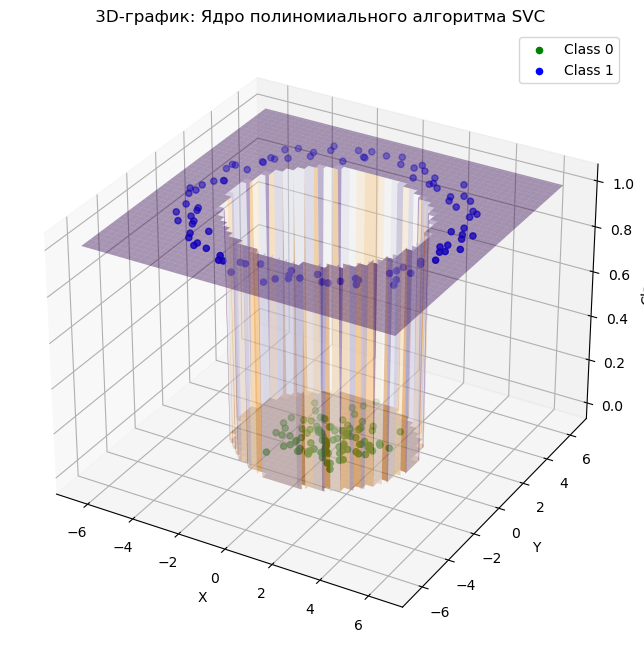

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D


# Создаем трехмерный график
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Визуализация данных и границ классов в трехмерном пространстве
ax.plot_surface(xx, yy, Z, alpha=0.4, cmap=plt.cm.PuOr)
ax.scatter(X1[:, 0], X1[:, 1], y1, c='g', label='Class 0')
ax.scatter(X2[:, 0], X2[:, 1], y2, c='b', label='Class 1')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Class')
ax.set_title(' 3D-график: Ядро полиномиального алгоритма SVC')

plt.legend()
plt.show()

In [104]:
from sklearn.svm import SVC

# Создаем экземпляр классификатора SVC
svc = SVC(kernel='linear')

# Обучаем модель
svc.fit(X, y)

y_pred = svc.predict(X)

print(svc.coef_)
print(svc.intercept_)

[[0.01385818 0.05630336 0.27369453]]
[-4.37824374]


In [105]:
from sklearn.metrics import accuracy_score
print("Accuracy:", svc.score(X,y))

Accuracy: 1.0


# Реализаця алгоритма SVC ( метод опорных векторов) 4 задание

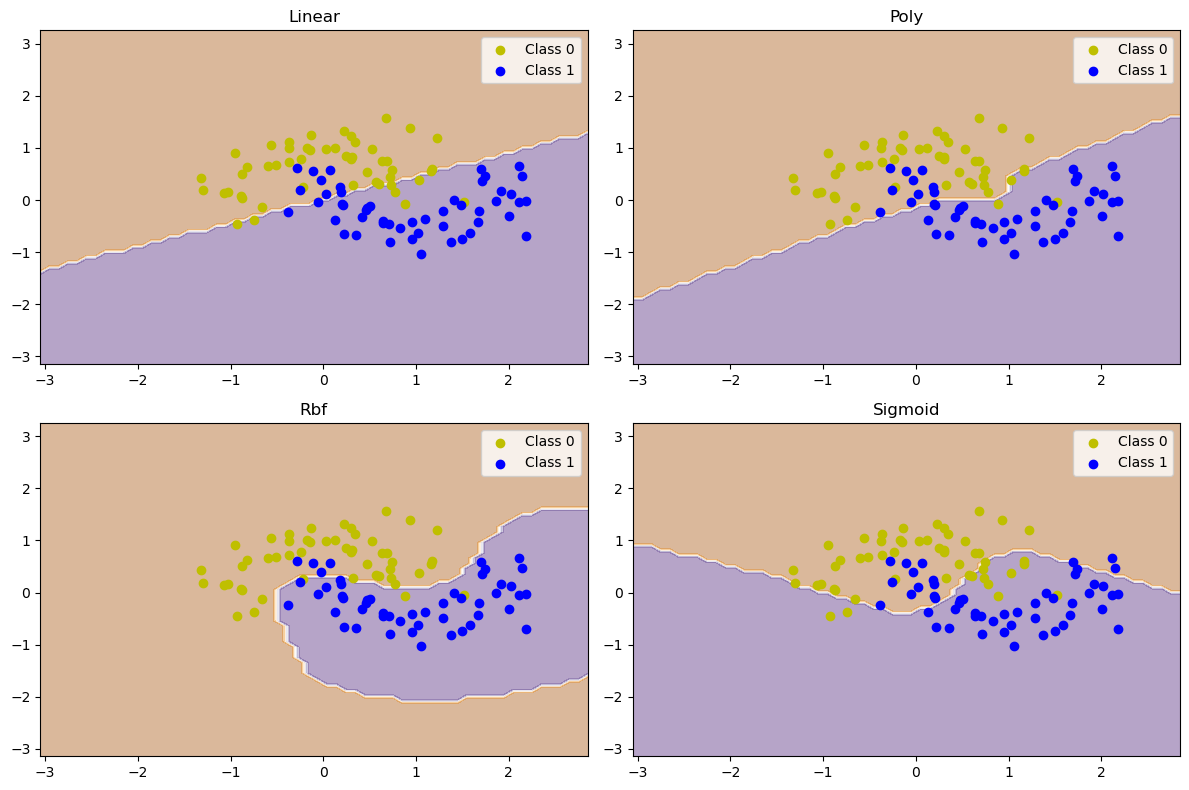

In [110]:
# Примение SVC для сгенерированных данных
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# SVC строю раздлеяющую гиперплоскость, но эта гиперплоскость строится так, чтобы разбить данные, 
# но еще расстояние между классами максимизировать. Есть ядра, 
# Генерируем два облака точек
np.random.seed(0)
n = 100
X, y =  make_moons(n_samples=n, noise=0.3)


# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем экземпляры классификаторов

svc_lin = SVC(kernel="linear")
svc_poly = SVC(kernel="poly", degree=3)
svc_rbf = SVC(kernel="rbf")
svc_sigmoid = SVC(kernel="sigmoid")


# Обучаем модели
svc_lin.fit(X_scaled, y)
svc_poly.fit(X_scaled, y)
svc_rbf.fit(X_scaled, y)
svc_sigmoid.fit(X_scaled, y)


# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_svc_lin = svc_lin.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_lin = Z_svc_lin.reshape(xx.shape)

Z_svc_poly = svc_poly.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_poly = Z_svc_poly.reshape(xx.shape)

Z_svc_rbf = svc_rbf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_rbf = Z_svc_rbf.reshape(xx.shape)

Z_svc_sigmoid = svc_sigmoid.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_sigmoid = Z_svc_sigmoid.reshape(xx.shape)



# Визуализируем данные и границы классов
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.contourf(xx, yy, Z_svc_lin, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Linear')
plt.legend()

plt.subplot(2, 2, 2)
plt.contourf(xx, yy, Z_svc_poly, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Poly')
plt.legend()

plt.subplot(2, 2, 3)
plt.contourf(xx, yy, Z_svc_rbf, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Rbf') # ridiel base function, основана на баевском делении
plt.legend()

plt.subplot(2, 2, 4)
plt.contourf(xx, yy, Z_svc_sigmoid, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Sigmoid')
plt.legend()


plt.tight_layout()
plt.show()
#разные ядра
# ядро - внутри самого алгоритма svc строится разделяюая поверхность по опорным векторам относительно ядра
# poly -полиномиальная

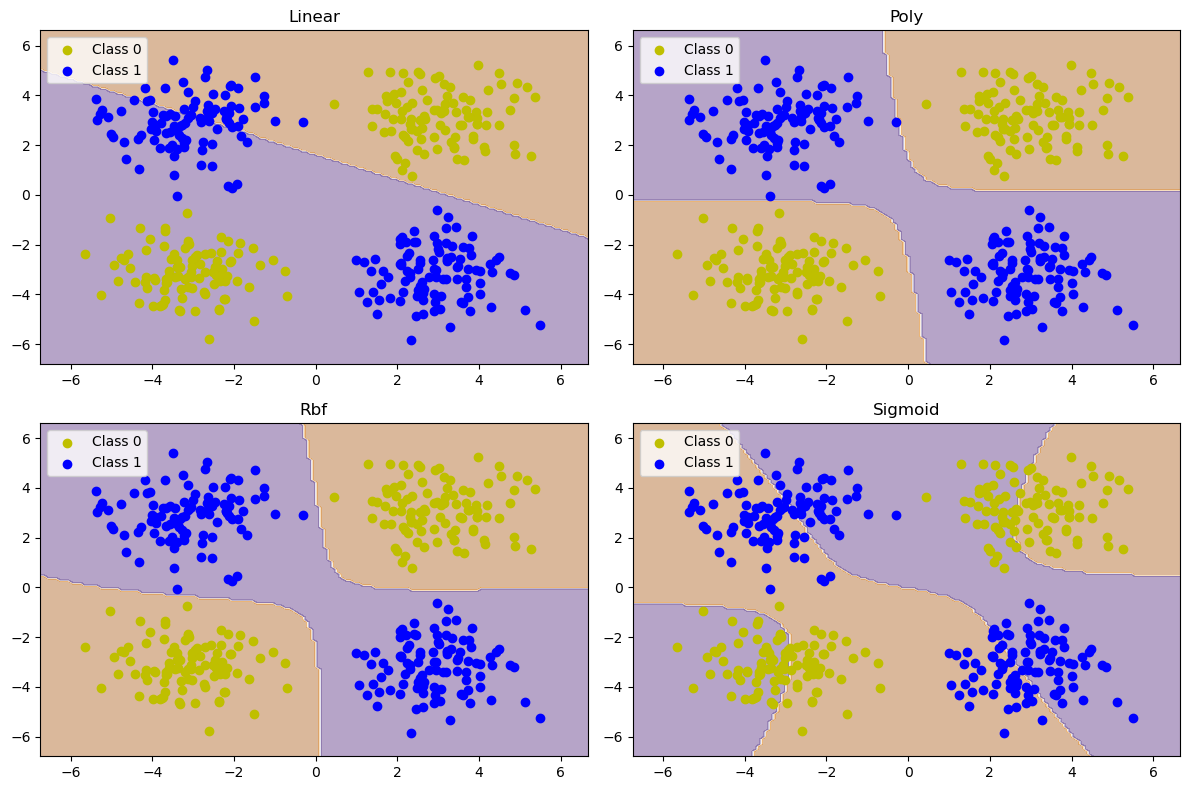

In [113]:
# Генерируем два облака точек
np.random.seed(0)
n = 100
mean1 = [3, 3]
cov1 = [[1, 0], [0, 1]]

mean2 = [-3, -3]
cov2 = [[1, 0], [0, 1]]

mean3 = [-3, 3]
cov3 = [[1, 0], [0, 1]]

mean4 = [3, -3]
cov4 = [[1, 0], [0, 1]]



# Генерируем случайные точки
X1 = np.random.multivariate_normal(mean1, cov1, n)
X2 = np.random.multivariate_normal(mean2, cov2, n)
X3 = np.random.multivariate_normal(mean3, cov3, n)
X4 = np.random.multivariate_normal(mean4, cov4, n)

# Создаем метки классов
y1 = np.zeros(2*n)
y2 = np.ones(2*n)

# Объединяем данные
X = np.concatenate((X1, X2, X3, X4))
y = np.concatenate((y1, y2))


# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем экземпляры классификаторов

svc_lin = SVC(kernel="linear")
svc_poly = SVC(kernel="poly", degree=2)
svc_rbf = SVC(kernel="rbf")
svc_sigmoid = SVC(kernel="sigmoid")


# Обучаем модели
svc_lin.fit(X_scaled, y)
svc_poly.fit(X_scaled, y)
svc_rbf.fit(X_scaled, y)
svc_sigmoid.fit(X_scaled, y)


# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 5, X_scaled[:, 0].max() + 5
y_min, y_max = X_scaled[:, 1].min() - 5, X_scaled[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_svc_lin = svc_lin.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_lin = Z_svc_lin.reshape(xx.shape)

Z_svc_poly = svc_poly.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_poly = Z_svc_poly.reshape(xx.shape)

Z_svc_rbf = svc_rbf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_rbf = Z_svc_rbf.reshape(xx.shape)

Z_svc_sigmoid = svc_sigmoid.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_sigmoid = Z_svc_sigmoid.reshape(xx.shape)



# Визуализируем данные и границы классов
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.contourf(xx, yy, Z_svc_lin, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Linear')
plt.legend()

plt.subplot(2, 2, 2)
plt.contourf(xx, yy, Z_svc_poly, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Poly')
plt.legend()

plt.subplot(2, 2, 3)
plt.contourf(xx, yy, Z_svc_rbf, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Rbf')
plt.legend()

plt.subplot(2, 2, 4)
plt.contourf(xx, yy, Z_svc_sigmoid, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Sigmoid')
plt.legend()



plt.tight_layout()
plt.show()

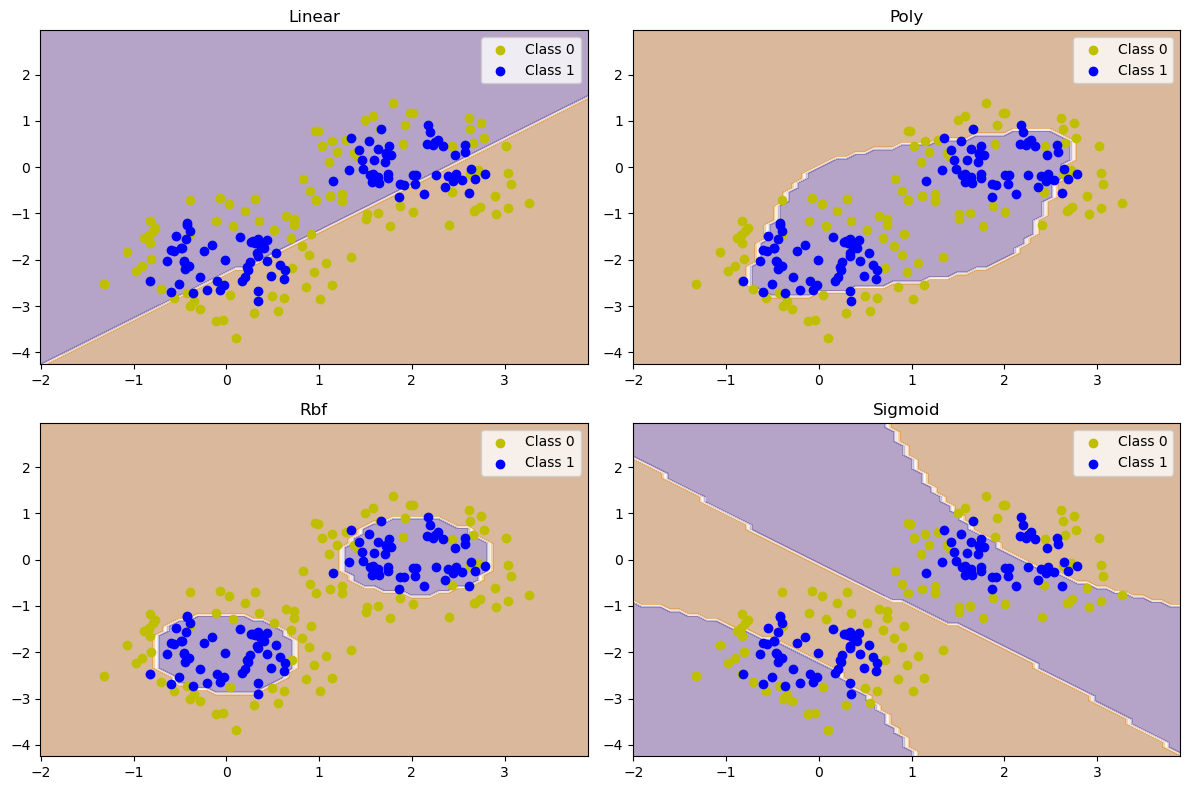

In [114]:
# Генерируем два облака точек
np.random.seed(0)
n = 100
X1, y1 = datasets.make_circles(n_samples=n, factor=.5,
                                      noise=.2)
X1[:, 1] -= 2  # Сдвигаем первую окружность по оси Y


X2, y2 = datasets.make_circles(n_samples=n, factor=.5,
                                      noise=.2)
X2[:, 0] += 2  # Сдвигаем вторую окружность по оси X

# Объединяем данные
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))


# Приводим данные к нулевому среднему и единичному стандартному отклонению
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем экземпляры классификаторов

svc_lin = SVC(kernel="linear")
svc_poly = SVC(kernel="poly", degree=4)
svc_rbf = SVC(kernel="rbf")
svc_sigmoid = SVC(kernel="sigmoid")


# Обучаем модели
svc_lin.fit(X_scaled, y)
svc_poly.fit(X_scaled, y)
svc_rbf.fit(X_scaled, y)
svc_sigmoid.fit(X_scaled, y)


# Вычисляем предсказания для всех точек в пространстве
x_min, x_max = X_scaled[:, 0].min() - 0, X_scaled[:, 0].max() + 2
y_min, y_max = X_scaled[:, 1].min() - 2, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_svc_lin = svc_lin.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_lin = Z_svc_lin.reshape(xx.shape)

Z_svc_poly = svc_poly.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_poly = Z_svc_poly.reshape(xx.shape)

Z_svc_rbf = svc_rbf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_rbf = Z_svc_rbf.reshape(xx.shape)

Z_svc_sigmoid = svc_sigmoid.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_svc_sigmoid = Z_svc_sigmoid.reshape(xx.shape)



# Визуализируем данные и границы классов
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.contourf(xx, yy, Z_svc_lin, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Linear')
plt.legend()

plt.subplot(2, 2, 2)
plt.contourf(xx, yy, Z_svc_poly, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Poly')
plt.legend()

plt.subplot(2, 2, 3)
plt.contourf(xx, yy, Z_svc_rbf, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Rbf')
plt.legend()

plt.subplot(2, 2, 4)
plt.contourf(xx, yy, Z_svc_sigmoid, alpha=0.4, cmap=plt.cm.PuOr)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='y', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', label='Class 1')
plt.title('Sigmoid')
plt.legend()


plt.tight_layout()
plt.show()

# SVC на своих данных

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("D:/Mirea/archive/glass.csv")
data.info()
x = data.drop(['Type'], axis = 1)
y = data['Type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [88]:
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [93]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = SVC(gamma='auto')
clf.fit(x_train, y_train)

SVC(gamma='auto')

In [96]:
y_pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# 0.5581395348837209 KNN
# 0.5813953488372093 SVC

0.5813953488372093

# Регрессионная версия метода опорных векторов (Support Vector Regression, SVR) ( 5 задание)

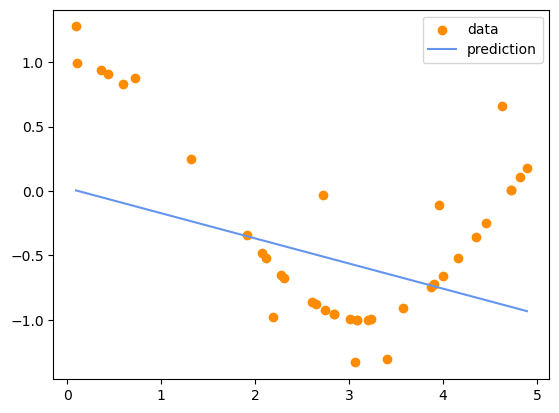

In [60]:
from sklearn.svm import SVR
#SVR -опорные вектора для регрессии
np.random.seed(0) # задание нач. значения для генерации случайных чисел
X = np.sort(5 * np.random.rand(40, 1), #создание массива размером(40,1)  с рандомными значениями, умноженными на 5 и отсортированными
            axis=0)
y = np.cos(X).ravel() # создание массива y содержащего косинусы каждого элемента x и преобразование его в одномерный массив

y[::5] += 2 * (0.5 - np.random.rand(8)) # добавление шума к каждому пятому элементу массива

svr = SVR(kernel='linear')

svr.fit(X, y)
y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import mean_squared_error
print("R-squared:", svr.score(X,y))
print("MSE:", mean_squared_error(y, y_pred))

R-squared: 0.4965838326143801
MSE: 0.22187853158796225


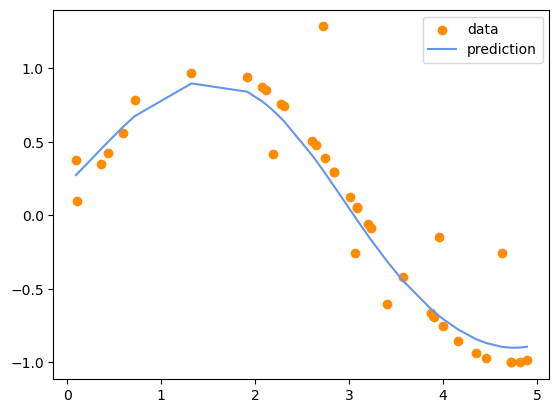

In [96]:
# RBF kernel
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 2 * (0.5 - np.random.rand(8))

svr = SVR(kernel='rbf')

svr.fit(X, y)
y_pred = svr.predict(X)

plt.scatter(X, y, color='darkorange',
            label='data')
plt.plot(X, y_pred, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [123]:
print("R-squared:", svr.score(X,y))
print("MSE:", mean_squared_error(y, y_pred))

R-squared: 0.8772460657793272
MSE: 0.05410327366515603


# SVR на своих данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv("D:/Mirea/cwurData.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [2]:
df = df.drop("institution", axis = 1)
df = df.drop("country", axis=1)
df = df.drop("broad_impact", axis = 1)
df.head(10)

y_test = df["quality_of_education"]
X_test = df.drop("quality_of_education", axis=1)

df = df.dropna(subset=['quality_of_education'])
X_train = df.drop("quality_of_education", axis=1)
#X_train = X_train.drop("is_top_ranked", axis=1)
y_train = df["quality_of_education"]

X_train

,world_rank,national_rank,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,9,1,1,1,1,5,100.00,2012
1,2,2,17,3,12,4,4,1,91.67,2012
2,3,3,11,5,4,2,2,15,89.50,2012
3,4,1,24,4,16,16,11,50,86.17,2012
4,5,4,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...
2195,996,7,567,218,926,845,812,816,44.03,2015
2196,997,4,566,218,997,908,645,871,44.03,2015
2197,998,18,549,218,830,823,812,824,44.03,2015
2198,999,40,567,218,886,974,812,651,44.02,2015


In [3]:
from sklearn.svm import SVR
clf = SVR(C=1.0, epsilon=0.2) # C -коэфф регулиризации, когда C большое сильнее штрафуют модель за любые ошибки
clf.fit(X_train, y_train)

SVR(epsilon=0.2)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
from sklearn.metrics import r2_score # стандартный коэффициент детерминации для выбора модели
r2_score(y_test, y_pred)

0.47777051506964374

In [7]:
import math #RMSE квадрат MSE реальная ошибка по предсказаному
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_pred))
# r2 = 0.8046284607464576
# RMSE = 53.884103575932464
# Ухудшение модели

88.09691640138477

In [18]:
X_train

,world_rank,national_rank,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,1,9,1,1,1,1,5,100.00,2012
1,2,2,17,3,12,4,4,1,91.67,2012
2,3,3,11,5,4,2,2,15,89.50,2012
3,4,1,24,4,16,16,11,50,86.17,2012
4,5,4,29,7,37,22,22,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...
2195,996,7,567,218,926,845,812,816,44.03,2015
2196,997,4,566,218,997,908,645,871,44.03,2015
2197,998,18,549,218,830,823,812,824,44.03,2015
2198,999,40,567,218,886,974,812,651,44.02,2015


In [102]:
y_train

0         7
1         9
2        17
3        10
4         2
       ... 
2195    367
2196    236
2197    367
2198    367
2199    367
Name: quality_of_education, Length: 2200, dtype: int64

In [57]:
y_pred

array([     169.67,      170.74,      170.57, ...,      364.93,      363.58,      363.35])

[  7   9  17 ... 367 367 367]
0         7
1         9
2        17
3        10
4         2
       ... 
2195    367
2196    236
2197    367
2198    367
2199    367
Name: quality_of_education, Length: 2200, dtype: int64


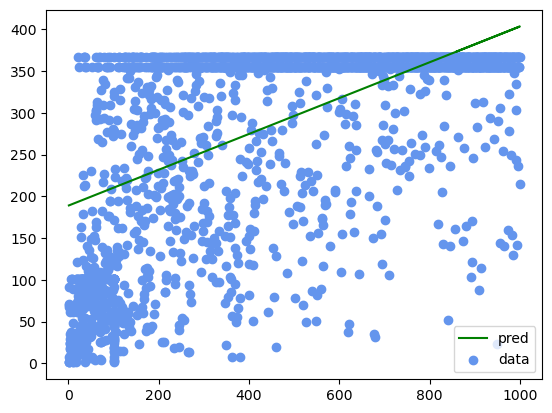

In [126]:
df = pd.read_csv("D:/Mirea/cwurData.csv")
x = df["publications"].values.reshape(-1,1)
y = df["quality_of_education"].ravel()# создание массива y содержащего косинусы каждого элемента x
print(y)
print(y_test)
#y[::5] += 2 * (0.5 - np.random.rand(8)) # добавление шума к каждому пятому элементу массива

svr = SVR(kernel='linear')


svr.fit(x, y)
y_pred = svr.predict(x)

plt.plot(x, y_pred, color='green',
         label='pred')
plt.scatter(x, y, color='cornflowerblue',
         label='data')

plt.legend()
plt.show()
#выделить данные 